# Regression
## Linear Regression
Let us start from the simple case in which we want to approximate our target function with a line. We have a dataset D with n pairs:
$$
D = \{(x_1,y_1), ... ,(x_N,y_N)\}
$$
and we want to approximate the targets as a linear function of the input:
$$
\hat{y_i} = a x_i + b 
$$
## Closed form Solution
From the previous lecture we saw that for the regression problems we need to minimize the Mean Squared Error (MSE) between the predicted values and the targets with respect to the model parameters:
$$
MSE = \frac{1}{2} \sum_{n=1}^N (y_n - \hat{y}_n)^2
$$
In our case the model is just a line, with parameters a and b:

To simplify the calculations let us call __w__ the vector with the parameters of the model:
$$
\mathbf{w} = \begin{pmatrix} b \\ a \end{pmatrix}
$$
Let us also write the points in the domain in vector notation:
$$
\mathbf{x_i} = \begin{pmatrix} 1 \\ x_i\end{pmatrix}
$$
Now let us introduce the vector __y__ with the target values of each point in the dataset:
$$
\mathbf{y} = \begin{pmatrix}y_1 \\ ... \\ y_n\end{pmatrix}
$$
and the matrix $\mathbb{X}$ which rows are the points in the domain:
$$
\mathbb{X} = \begin{pmatrix}1 & x_1 \\ 1 & x_2 \\ . & . \\ . & . \\ 1 & x_n\end{pmatrix}
$$
Now we can write the cost function in vector notation:
$$
L_D(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N (y_n - \mathbf{w}^T \mathbf{x_n})^2 = || \mathbf{y} - \mathbb{X} \mathbf{w} ||^2
$$
The function L is a convex function with respect to the parameters, hence we can find the minimum by solving the linear system of equations:
$$
\nabla_{\mathbf{w}}L = 0
$$
We are in the lucky case in which the solution to this system can be computed in closed form. Lets walk through the computation:
$$
\nabla_{\mathbf{w}}L = -2 \mathbf{X}^T (\mathbf{y}-\mathbb{X}\mathbf{w}) = 0
$$
$$
\mathbf{w} = (\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}^T\mathbf{y}
$$

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
NPOINTS = 100

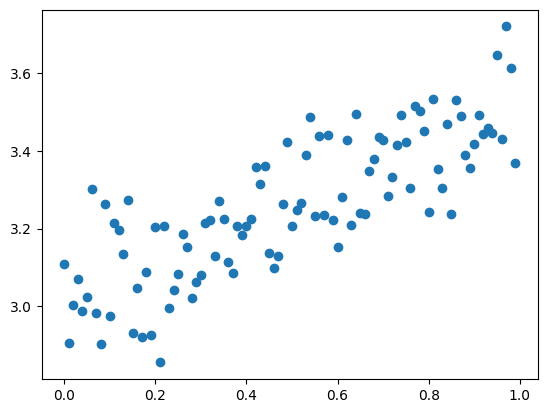

In [8]:
x = np.arange(0,1,1/NPOINTS)
y = 0.5 * x + 3 + np.random.normal(loc=0,scale=.1,size=NPOINTS)
fig,ax = plt.subplots()
ax.scatter(x,y)
plt.show()

In [11]:
X = np.stack([
    np.ones_like(x),x
],axis=-1)

X.shape

(100, 2)

In [12]:
X_t = np.transpose(X)

X_t.shape

(2, 100)

In [17]:
w = np.linalg.inv(X_t @ X) @ X_t @ y

w.shape

(2,)

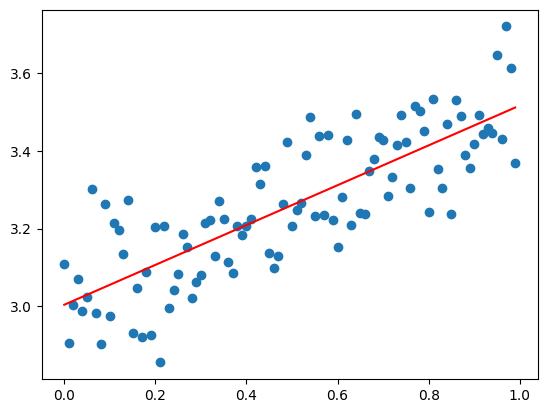

In [19]:
y_pred = w[0] + w[1] * x
fig,ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,y_pred,c="r")
plt.show()